# Python Revision History

First set this variable name to where your git clone of the cpython repository is:

In [14]:
git_repo = '/Users/edsu/Projects/cpython/.git'

Now, assuming you have git installed, this little hack will read through the output of `git log` for the repo and count the commits per year. I guess I could have used a git python module, and parsed the full date, but this was done in a pinch :-)

In [15]:
import re
import subprocess
from collections import Counter

commit_counts = Counter()
cmd = ['git', '--git-dir', git_repo, '-P', 'log']
for line in subprocess.run(cmd, capture_output=True).stdout.decode('utf8').split('\n'):
    m = re.match('^Date:.+([12]\d\d\d) +', line)
    if m:
        commit_counts[m.group(1)] += 1

Now we can put our counter into a pandas DataFrame:

In [16]:
import pandas

df = pandas.DataFrame.from_dict(commit_counts, orient='index', columns=['commits'])
df.index.name = 'year'
df = df.sort_values('year')
df.head()

,commits
year,
1990,105
1991,445
1992,627
1993,289
1994,582


And we can plot it!

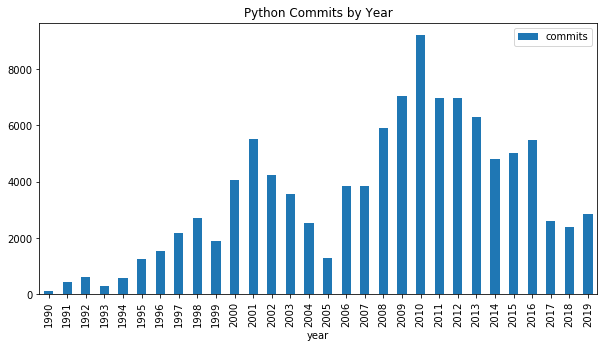

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot.bar(title="Python Commits by Year", figsize=(10, 5))